# Ejercicios - Clase 10

Ejercicios de los bloques de introducción a python. Pandas III

**Versión**: 1.0

**Fecha**: 28/10/2023

En este notebook vamos a trabajar con un dataset que vamos a generar en el propio notebook. Es un dataset sencillo donde entender los conceptos más complejos de Pandas.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Generación del Dataset

En el dataset vamos a representar cuántas frutas de cada tipo se venden en una lista de ciudades. Para ello vamos a definir dos listas, `nombre_frutas` y `nombre_ciudades` con varias opciones para generar una tabla.

In [69]:
nombre_frutas = ["Peras", "Manzanas", "Naranjas", "Platanos", "Kiwis", "Aguacates", "Melocotones", "Piñas", "Papayas", "Fresas"] # (10,)
nombre_ciudades = ["Madrid", "Barcelona", "Sevilla", "Burgos", "Segovia", "Cádiz"] # (6,)

Ahora, vamos a definir en otra lista, `habitantes`, el número de habitantes por ciudad (aproximado).

In [70]:
habitantes = [3200000, 1600000, 700000, 200000, 50000, 120000] # (6,)

Nuestro dataset va a generar de forma aleatoria el número de frutas que comen por ciudad, considerando que un ciudadano solamente come un tipo de fruta.

In [71]:
# Creamos el generador de números aleatorios
rng = np.random.default_rng(42)

# Creamos las probabilidades entre [0, 1) de que las frutas se coman en cada ciudad
probs = rng.uniform(0, 1, size=(len(nombre_ciudades), len(nombre_frutas))) # (6,10)

# Seleccionamos aleatoriamente las frutas que no se comen en cada ciudad
i_zero = rng.choice(len(nombre_frutas), size=len(nombre_ciudades), replace=True) # (6,)
probs[np.arange(len(nombre_ciudades)), i_zero] = 0 # (6,10)

# Normalizamos las probabilidades para que sumen 1
# keepdims=True => mantiene las dimensiones (6,1); keepdims=False => (6,)
probs_normalizadas = probs / probs.sum(axis=1, keepdims=True) # (6,10) / (6,) = (6,10)

# Las probabilidades normalizadas se pueden asumir como porcentajes
consumo_frutas_por_ciudad = (probs_normalizadas * np.array(habitantes)[:, np.newaxis]).astype(int) # (6,10) * (6,1) = (6,10)

# Sumamos los habitantes que no se han asignado por la conversión a int, a la última fruta
consumo_frutas_por_ciudad[:, -1] += np.array(habitantes) - consumo_frutas_por_ciudad.sum(axis=1)

Para comprobar el cálculo anterior, hay que sumar por filas:

In [72]:
np.all(consumo_frutas_por_ciudad.sum(axis=1) == habitantes)

True

Por último, generamos el nuevo dataset con el consumo de cada tipo de fruta por ciudad.

In [73]:
pd.DataFrame(consumo_frutas_por_ciudad, index=nombre_ciudades, columns=nombre_frutas)

,Peras,Manzanas,Naranjas,Platanos,Kiwis,Aguacates,Melocotones,Piñas,Papayas,Fresas
Madrid,421909,239247,468050,380158,0,531844,414922,428509,69838,245523
Barcelona,119661,299079,207784,265516,143095,73333,0,20594,267087,203851
Sevilla,109854,51374,140663,129421,112795,28205,0,6347,22358,98983
Burgos,36326,47191,15892,18069,0,9241,6337,23202,11067,32675
Segovia,4616,8792,7394,3298,8788,8497,4091,3044,0,1480
Cádiz,6579,242,25898,21880,23207,0,15103,18717,4600,3774


In [74]:
dataframes = {}
for i_ciudad, ciudad in enumerate(nombre_ciudades):
    # 0, Madrid
    # 1, Barcelona
    # ...
    df = pd.DataFrame(columns=["Fruta", "Consumo"])
    for i_fruta, fruta in enumerate(nombre_frutas):
        # 0, Peras
        # 1, Manzanas
        # ...
        if consumo_frutas_por_ciudad[i_ciudad, i_fruta] > 0:
            # df.loc[0] = ['Peras', 421909]
            # df.loc[1] = ['Manzanas', 239247]
            # ...
            df.loc[len(df)] = [fruta, consumo_frutas_por_ciudad[i_ciudad, i_fruta]]
    dataframes[ciudad] = df

Para obtener, por ejemplo, el consumo de la ciudad `Madrid`:

In [75]:
dataframes['Madrid']

,Fruta,Consumo
0,Peras,421909
1,Manzanas,239247
2,Naranjas,468050
3,Platanos,380158
4,Aguacates,531844
5,Melocotones,414922
6,Piñas,428509
7,Papayas,69838
8,Fresas,245523


## Ejercicio 0

Comprueba si es necesario realizar algún preprocesado de los tipos de datos del dataset.

In [76]:
# TO-DO Realiza las comprobaciones necesarias
df.info()

# No es necesario realizar ningún preprocesado ya que Ciudad y Fruta son strings

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Fruta    9 non-null      object
 1   Consumo  9 non-null      int32 
dtypes: int32(1), object(1)
memory usage: 180.0+ bytes


## Ejercicio 1

Genera un único dataframe cuyas columnas sean `Ciudad`, `Fruta` y `Consumo` a partir de los dataframes originales.

In [77]:
# TO-DO Genera un dataframe nuevo que se llame df y procesa en un bucle cada uno de los dataframes de cada ciudad
# para acabar con un dataset con 3 columnas: Ciudad, Fruta y Consumo
# Para ello, probablemente vas a necesitar los métodos concat y el fillna
df = pd.DataFrame()
for ciudad in nombre_ciudades:
    df_ciudad = dataframes[ciudad]
    df_ciudad = pd.concat([pd.Series([ciudad]), df_ciudad], axis=1).ffill()
    df = pd.concat([df, df_ciudad])
df.columns = ["Ciudad", "Fruta", "Consumo"]
df.sample(5)

,Ciudad,Fruta,Consumo
7,Madrid,Papayas,69838
2,Sevilla,Naranjas,140663
0,Cádiz,Peras,6579
3,Sevilla,Platanos,129421
7,Barcelona,Papayas,267087


## Ejercicio 2

Utilizando **pivotTable**, transforma el dataset que has generado en el ejercicio anterior para construir un dataset nuevo donde tengas como índice la ciudad y una columna por el consumo de cada fruta.

In [78]:
# TO-DO Genera el dataframe df_pivot
df_pivot = df.pivot_table(index="Ciudad", columns="Fruta", values="Consumo")
df_pivot

Fruta,Aguacates,Fresas,Kiwis,Manzanas,Melocotones,Naranjas,Papayas,Peras,Piñas,Platanos
Ciudad,,,,,,,,,,
Barcelona,73333.0,203851.0,143095.0,299079.0,NaN,207784.0,267087.0,119661.0,20594.0,265516.0
Burgos,9241.0,32675.0,NaN,47191.0,6337.0,15892.0,11067.0,36326.0,23202.0,18069.0
Cádiz,NaN,3774.0,23207.0,242.0,15103.0,25898.0,4600.0,6579.0,18717.0,21880.0
Madrid,531844.0,245523.0,NaN,239247.0,414922.0,468050.0,69838.0,421909.0,428509.0,380158.0
Segovia,8497.0,1480.0,8788.0,8792.0,4091.0,7394.0,NaN,4616.0,3044.0,3298.0
Sevilla,28205.0,98983.0,112795.0,51374.0,NaN,140663.0,22358.0,109854.0,6347.0,129421.0


Si el azar así lo ha querido, muy posiblemente tengas **NaN** en algunas celdas. Esto sucede por la manera en la que se han generado los valores de consumo de las tablas, ya que hemos forzado a que alguna fruta tenga un valor 0 en cada fila. Rellena los valores NaN con un valor coherente para este dataset.

In [79]:
# TO-DO Rellena los valores NaN con un valor coherente para este dataset
df_pivot.fillna(0, inplace=True)
df_pivot

Fruta,Aguacates,Fresas,Kiwis,Manzanas,Melocotones,Naranjas,Papayas,Peras,Piñas,Platanos
Ciudad,,,,,,,,,,
Barcelona,73333.0,203851.0,143095.0,299079.0,0.0,207784.0,267087.0,119661.0,20594.0,265516.0
Burgos,9241.0,32675.0,0.0,47191.0,6337.0,15892.0,11067.0,36326.0,23202.0,18069.0
Cádiz,0.0,3774.0,23207.0,242.0,15103.0,25898.0,4600.0,6579.0,18717.0,21880.0
Madrid,531844.0,245523.0,0.0,239247.0,414922.0,468050.0,69838.0,421909.0,428509.0,380158.0
Segovia,8497.0,1480.0,8788.0,8792.0,4091.0,7394.0,0.0,4616.0,3044.0,3298.0
Sevilla,28205.0,98983.0,112795.0,51374.0,0.0,140663.0,22358.0,109854.0,6347.0,129421.0


¿Por qué has tomado esa decisión?

In [80]:
# TO-DO Incluye tu respuesta en el comentario
"""
Lo lógico parece ser rellenar los NaN con 0 ya que no se ha generado ningún registro cuando no había consumo 
de esa fruta.
""";

## Ejercicio 3

Si volvemos a la forma en la que hemos generado los datos, vamos a visualizar de nuevo la matriz `consumo_frutas_por_ciudad`.

In [81]:
consumo_frutas_por_ciudad

array([[421909, 239247, 468050, 380158,      0, 531844, 414922, 428509,
         69838, 245523],
       [119661, 299079, 207784, 265516, 143095,  73333,      0,  20594,
        267087, 203851],
       [109854,  51374, 140663, 129421, 112795,  28205,      0,   6347,
         22358,  98983],
       [ 36326,  47191,  15892,  18069,      0,   9241,   6337,  23202,
         11067,  32675],
       [  4616,   8792,   7394,   3298,   8788,   8497,   4091,   3044,
             0,   1480],
       [  6579,    242,  25898,  21880,  23207,      0,  15103,  18717,
          4600,   3774]])

Se parece a la pivotTable que hemos gneerado en el ejercicio anterior. De hecho, deben tener exactamente la misma información ya que representan lo mismo. Genera directamente un dataframe con la matriz `consumo_frutas_por_ciudad`.

In [82]:
# TO-DO Genera un nuevo dataframe df a partir de la matriz consumo_frutas_por_ciudad
df = pd.DataFrame(consumo_frutas_por_ciudad, 
                  index=nombre_ciudades, 
                  columns=nombre_frutas).sort_index(axis=0).sort_index(axis=1)
df

,Aguacates,Fresas,Kiwis,Manzanas,Melocotones,Naranjas,Papayas,Peras,Piñas,Platanos
Barcelona,73333,203851,143095,299079,0,207784,267087,119661,20594,265516
Burgos,9241,32675,0,47191,6337,15892,11067,36326,23202,18069
Cádiz,0,3774,23207,242,15103,25898,4600,6579,18717,21880
Madrid,531844,245523,0,239247,414922,468050,69838,421909,428509,380158
Segovia,8497,1480,8788,8792,4091,7394,0,4616,3044,3298
Sevilla,28205,98983,112795,51374,0,140663,22358,109854,6347,129421


## Ejercicio 4

Obtén cierta información a partir del dataset:

**4.1** Las tres ciudades que más naranjas consumen respecto al total de su población.

In [83]:
# TO-DO Rellena esta celda para realizar el ejercicio
df["Naranjas_pct"] = df["Naranjas"] / df.sum(axis=1)
df.sort_values(by="Naranjas_pct", ascending=False)[:3]

,Aguacates,Fresas,Kiwis,Manzanas,Melocotones,Naranjas,Papayas,Peras,Piñas,Platanos,Naranjas_pct
Cádiz,0,3774,23207,242,15103,25898,4600,6579,18717,21880,0.215817
Sevilla,28205,98983,112795,51374,0,140663,22358,109854,6347,129421,0.200947
Segovia,8497,1480,8788,8792,4091,7394,0,4616,3044,3298,0.147880


**4.2** Las tres ciudades con más equilibrio en el consumo de frutas. Para ello, podemos asumir que una ciudad con un consumo equilibrado es aquella que tiene una desviación estándar pequeña en comparación con el resto. En el caso extremo donde `std = 0` estaríamos hablando de que todas las frutas se consumen por igual.

In [84]:
# TO-DO Rellena esta celda para realizar el ejercicio
for fruta in nombre_frutas:
    df[fruta+"_pct"] = df[fruta] / df.sum(axis=1)
df["std"] = df[[fruta+"_pct" for fruta in nombre_frutas]].std(axis=1)
df.sort_values(by="std")[:3]

,Aguacates,Fresas,Kiwis,Manzanas,Melocotones,Naranjas,Papayas,Peras,Piñas,Platanos,...,Peras_pct,Manzanas_pct,Platanos_pct,Kiwis_pct,Aguacates_pct,Melocotones_pct,Piñas_pct,Papayas_pct,Fresas_pct,std
Madrid,531844,245523,0,239247,414922,468050,69838,421909,428509,380158,...,0.131847,0.074765,0.118799,0.000000,0.166201,0.129663,0.133909,0.021824,0.076726,0.054985
Segovia,8497,1480,8788,8792,4091,7394,0,4616,3044,3298,...,0.092320,0.175839,0.065959,0.175758,0.169938,0.081819,0.060879,0.000000,0.029599,0.063866
Barcelona,73333,203851,143095,299079,0,207784,267087,119661,20594,265516,...,0.074788,0.186924,0.165947,0.089434,0.045833,0.000000,0.012871,0.166929,0.127407,0.066081


Incluye el código para visualizar este mismo resultado con una figura de barras. En la figura se debe ver que las ciudades con menor std en la celda anterior son aquellas donde el consumo tiene menos "picos", es decir, es más uniforme en la población.

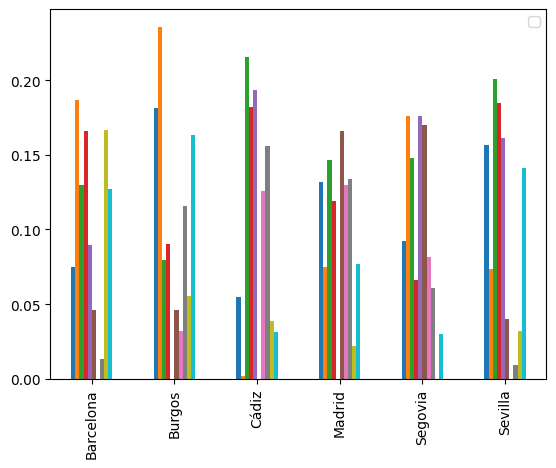

In [85]:
# TO-DO Rellena esta celda con un plot.bar() para visualizar el resultado
df[[fruta+"_pct" for fruta in nombre_frutas]].plot.bar()
plt.legend([])
plt.show()